<a href="https://colab.research.google.com/github/Ashi743/my_projects-/blob/main/ML%20on%20NLP%20sentiment%20analuysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [ ]:
df= pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
#df.info()
#df.describe()
#ALL GOOD
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
#split to X and Y
#Label encoding sentiments

#reconnaisance

#lowercase
#html tags
#url removal
#punctuations

#chat word treatment ,  if any check on 1-5 revieews first # TIME COMPLEX
#spelling check  ,  if any check on 1-5 revieews first # TIME COMPLEX
#stopwords
#emojis  ,  if any check on 1-5 revieews first # TIME COMPLEX
#TOKENIZATION
#stemming
#lemmitization   ,  if any check on 1-5 revieews first # TIME COMPLEX
#join all


In [ ]:
#split to X and Y
#Label encoding sentiments
X= df.drop(columns= "sentiment")
Y= df["sentiment"]
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
Y_le= le.fit_transform(Y)
Y_le
#positve encoded as 1 negative as 0

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
#positive vs neagative sentiments
Y.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [ ]:
def frequency_words(text):
    words_freq= []
    for word in text.split():
        words_freq.extend(word)
    words_freq= pd.Series(words_freq).value_counts()
    words_freq= words_freq[:100]
    return words_freq

In [ ]:
freq= frequency_words(df.review.str)

In [ ]:
freq

the      568735
a        306960
and      301919
of       283625
to       261850
          ...  
made      13418
think     13083
bad       12847
him       12506
being     12290
Name: count, Length: 100, dtype: int64

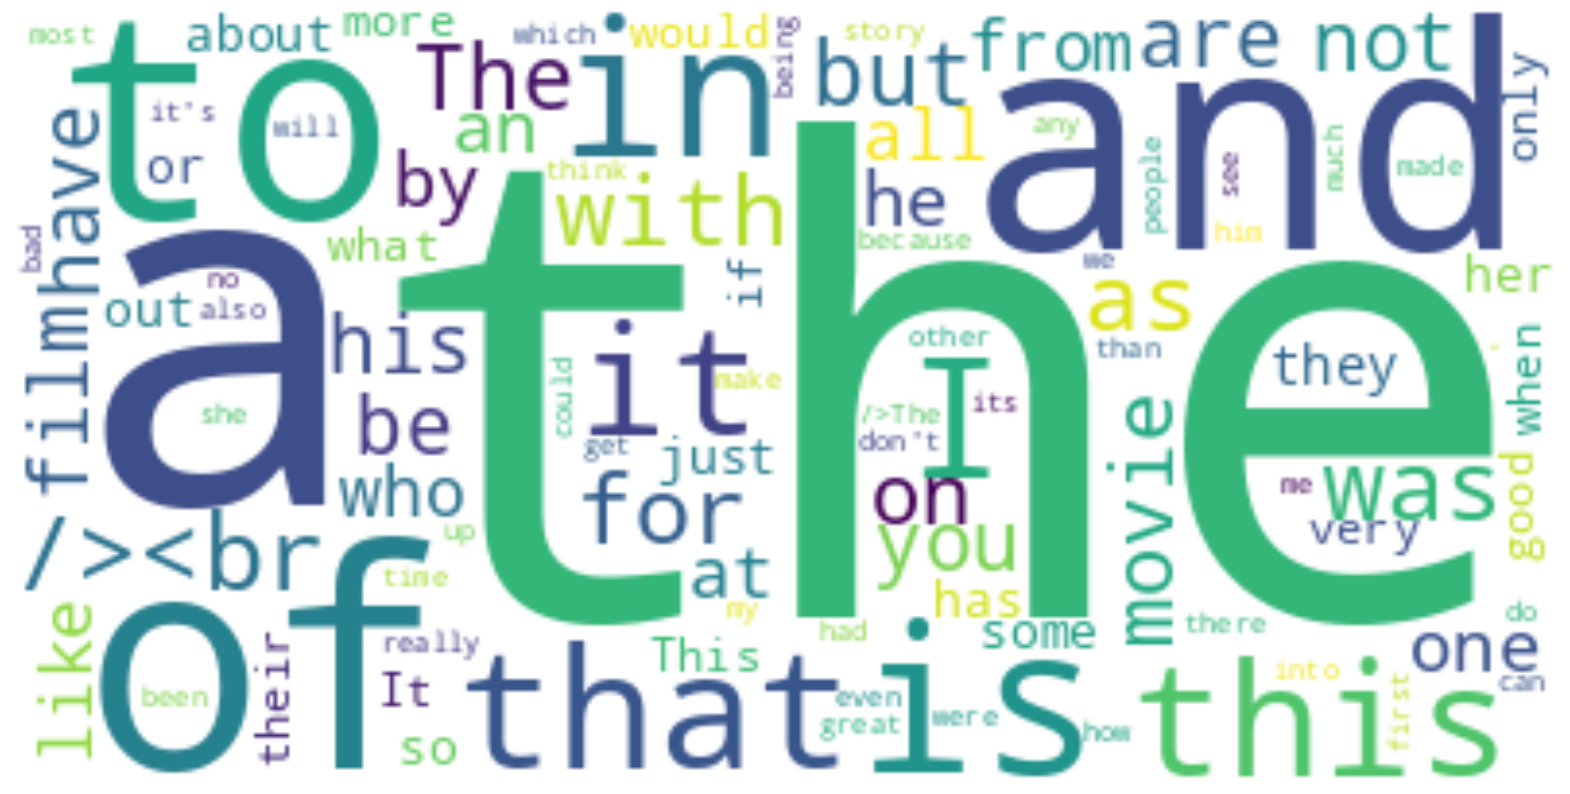

In [ ]:
#word cloud
import matplotlib.pyplot as plt

from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wrdcld= WordCloud(max_words=500, background_color='white').generate_from_frequencies(freq)
plt.axis('off')
plt.imshow(wrdcld, interpolation= 'bilinear')
plt.show()

In [ ]:
#positive reviews
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5).generate(" ".join(df[df.sentiment=='positive'].review))
plt.axis('off')
plt.imshow(Wc,interpolation='bilinear')
plt.show()


In [ ]:
#negative reviews
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500).generate(" ".join(df[df.sentiment=='negative'].review))
plt.axis('off')
plt.imshow(Wc,interpolation='bilinear')
plt.show()


***Preprocessing***

In [ ]:
import re

def removal_1(text):
    # Lowercase the text
    text = text.lower()  # If it's a string, otherwise use text.str.lower() for pandas

    # Remove HTML tags
    html_pattern = re.compile(r'<.*?>')
    text = html_pattern.sub("", text)

    # Remove punctuations (all punctuations)
    punctuation_pattern = re.compile(r'[^\w\s]')  # This removes anything that's not a word character or space
    text = punctuation_pattern.sub("", text)

    # Remove extraneous phrases (e.g., "Trust me,")
    extraneous_phrase_pattern = re.compile(r'trust me,', re.IGNORECASE)  # Case-insensitive phrase match
    text = extraneous_phrase_pattern.sub("", text)

    # Remove URLs (generic pattern for any URL)
    url_pattern = re.compile(r'https?://\S+')  # Matches any URL starting with http or https
    text = re.sub(url_pattern, "", text)

    return text


In [ ]:
X["review"]= X["review"].apply(removal_1)

In [ ]:
chat_slangs={
    "D":'had',
    "S":'is',
    "LL":'will',
    "VE":'have',
    "M":'am',
    "U":'you',
    "T":'not',
    "COULDN":'could',
    "SHOULDN":'should',
    "WOULDN":'would',
    "DIDN":'did',
    "DON":'do',
    "DOESN":'does',
    "AREN":'are',
    "WASN":'was',
    "AIN":'is',
    "ISN":'is',
    'TKTS':'tickets',
    'USF':'useful',
    'C':'see',
    'U':'you',
    "M":'am',
    "VE":'have',
    "LL":'will',
    "T":'not',
    "RE":'are',
    '1':'one',
    '2':'two',
    '3':'three',
    '4':'four',
    '5':'five',
    '6':'six',
    '7':'seven',
    '8':'eight',
    '9':'nine',
    '10':'ten',
    'ND':'second',
     "MG":'milligram',
     "XS":"times",
    "X":"times",

}


In [ ]:
X["review"]

In [ ]:
#TOKENIZAION AND STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    # Define stopwords in English
    stop_words = set(stopwords.words('english'))

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove stopwords
    new_text = [word for word in tokens if word.lower() not in stop_words]

    # Return the cleaned text as a single string
    return " ".join(new_text)


In [ ]:
X["review"]= X["review"].apply(remove_stopwords)

In [ ]:
X["review"]

In [ ]:
#stemming on all
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

def stem_words(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Stem each word in the tokenized list
    stemmed_words = [ps.stem(word) for word in tokens]

    # Return the stemmed words as a list (or join them back into a sentence)
    return stemmed_words


In [ ]:
X["review"]=X["review"].apply(stem_words)

In [ ]:
#join
def join_back(text):
    return " ".join(text)

In [ ]:
X["review"]=X["review"].apply(join_back)

In [ ]:
'''#lemmetization on few then maybe apply
import spacy

# Load the SpaCy model (e.g., 'en_core_web_sm' for English)
nlp = spacy.load('en_core_web_sm')

def lemmatization(text):
    new_text = []
    doc = nlp(text)
    for token in doc:
        new_text.append(token.lemma_)
    return " ".join(new_text)'''

In [ ]:
#X["review"]=X["review"].apply(lemmatization)   to computational

In [ ]:
new_df = pd.DataFrame({
    'review': X['review'],  # This is the feature column
    'label': Y_le           # This is the target column
})

In [ ]:
#negative reviews after preprocessing
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500).generate(" ".join(new_df[new_df.label==0].review))
plt.axis('off')
plt.imshow(Wc,interpolation='bilinear')
plt.show()


In [ ]:
#positive reviews after preprocessing
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500).generate(" ".join(new_df[new_df.label==1].review))
plt.axis('off')
plt.imshow(Wc,interpolation='bilinear')
plt.show()


*** Find out the number of words in the entire corpus
and also the total number of unique words(vocabulary)
using just python***

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Sample corpus
corpus = X["review"].tolist()  # Convert to list if it's a pandas Series

def compute_word_statistics(corpus):
    all_words = []

    # Tokenize each review and collect all tokens
    for text in corpus:
        tokens = word_tokenize(text)
        all_words.extend(tokens)

    # Count total words
    total_words = len(all_words)

    # Count unique words (vocabulary)
    unique_words = len(set(all_words))

    return total_words, unique_words

# Compute statistics
total_words, unique_words = compute_word_statistics(corpus)
print("Total number of words:", total_words)
print("Total number of unique words:", unique_words)


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Sample corpus (replace with X["review"] in practice)
corpus = X["review"].tolist()

# Create a CountVectorizer instance
vectorizer = CountVectorizer(binary=True)  # Use binary=True for One Hot Encoding

# Fit and transform the corpus to get the binary matrix
X_one_hot = vectorizer.fit_transform(corpus)

# Convert to DataFrame for better readability
one_hot_df = pd.DataFrame(X_one_hot.toarray(), columns=vectorizer.get_feature_names_out())

print(one_hot_df.head())
#binary=True configures the CountVectorizer to perform One Hot Encoding instead of counting occurrences.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Sample corpus (replace with X["review"] in practice)
corpus = X["review"].tolist()

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the corpus to get the document-term matrix
X_bow = vectorizer.fit_transform(corpus)

# Convert to DataFrame for better readability
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Get vocabulary and word frequencies
vocabulary = vectorizer.get_feature_names_out()
word_counts = X_bow.sum(axis=0).A1  # Sum over the rows to get the word frequencies

# Create a DataFrame to show word counts
word_count_df = pd.DataFrame({'Word': vocabulary, 'Count': word_counts})

print("Bag of Words Matrix:")
print(bow_df.head())

print("\nVocabulary and Word Frequencies:")
print(word_count_df)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Sample corpus (replace with X["review"] in practice)
corpus = X["review"].tolist()

# Create CountVectorizer instances for bigrams and trigrams
vectorizer_bi = CountVectorizer(ngram_range=(2, 2))  # Bigrams
vectorizer_tri = CountVectorizer(ngram_range=(3, 3))  # Trigrams

# Fit and transform the corpus to get the document-term matrix for bigrams and trigrams
X_bi = vectorizer_bi.fit_transform(corpus)
X_tri = vectorizer_tri.fit_transform(corpus)

# Convert to DataFrame for better readability
bi_df = pd.DataFrame(X_bi.toarray(), columns=vectorizer_bi.get_feature_names_out())
tri_df = pd.DataFrame(X_tri.toarray(), columns=vectorizer_tri.get_feature_names_out())

# Get vocabulary and word frequencies for bigrams and trigrams
bi_vocabulary = vectorizer_bi.get_feature_names_out()
tri_vocabulary = vectorizer_tri.get_feature_names_out()

bi_word_counts = X_bi.sum(axis=0).A1  # Sum over the rows to get the bigram frequencies
tri_word_counts = X_tri.sum(axis=0).A1  # Sum over the rows to get the trigram frequencies

# Create DataFrames to show bigram and trigram counts
bi_word_count_df = pd.DataFrame({'Bigram': bi_vocabulary, 'Count': bi_word_counts})
tri_word_count_df = pd.DataFrame({'Trigram': tri_vocabulary, 'Count': tri_word_counts})

print("Bag of Bigrams Matrix:")
print(bi_df.head())

print("\nVocabulary and Bigram Frequencies:")
print(bi_word_count_df)

print("\nBag of Trigrams Matrix:")
print(tri_df.head())

print("\nVocabulary and Trigram Frequencies:")
print(tri_word_count_df)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample corpus (replace with X["review"] in practice)
corpus = X["review"].tolist()

# Create a TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Fit and transform the corpus to get the TF-IDF matrix
X_tfidf = vectorizer.fit_transform(corpus)

# Convert to DataFrame for better readability (TF-IDF matrix)
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Get the vocabulary and IDF scores
vocabulary = vectorizer.get_feature_names_out()
idf_scores = vectorizer.idf_

# Create a DataFrame to show IDF scores
idf_df = pd.DataFrame({'Word': vocabulary, 'IDF': idf_scores})

print("TF-IDF Matrix:")
print(tfidf_df.head())

print("\nVocabulary and IDF Scores:")
print(idf_df)
